In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Work From Earlier Assignments

## Part 0: Strategy, Tests, and Cleaning

### Strategy and Useful Scripts

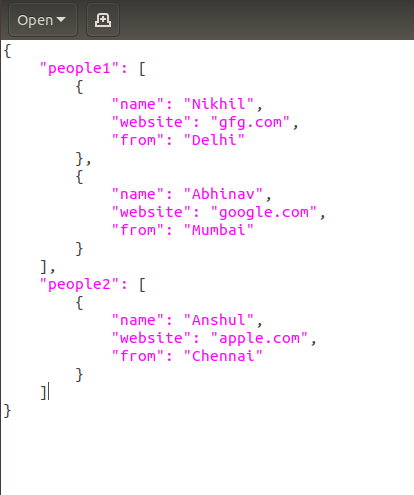

In [ ]:
#DO NOT RUN THIS CELL

# messages folder location: /content/drive/MyDrive/Colab Notebooks/messages

##################################
# Conversion of JSON data to the dictionary above
  
import json
  
with open('data.json') as json_file:
    data = json.load(json_file)
  
    # Print the type of data variable
    print("Type:", type(data))
  
    # Print the data of dictionary
    print("\nPeople1:", data['people1'])
    print("\nPeople2:", data['people2'])

##################################

#Creating dataframe from dictionary object.
import pandas as pd
data = [{'name': 'vikash', 'age': 27}, {'name': 'Satyam', 'age': 14}]
df = pd.DataFrame.from_dict(data, orient='columns')

In [ ]:
#CELL RUNS BUT IS NOT USEFUL
#Printed count tells me how many conversations (folders) there are

import os

# abspath to a folder as a string
folder = '/content/drive/MyDrive/Colab Notebooks/messages'


count = 0

for dirname, dirs, files in os.walk(folder):
    for filename in files:
        filename_without_extension, extension = os.path.splitext(filename)
        if extension == '.json':
            count +=1
            #print(filename_without_extension)
print(count, lines)

1428 0


### Test Run

In [ ]:
import json
import os

folder = '/content/drive/MyDrive/Colab Notebooks/messages'


count = 0

for dirname, dirs, files in os.walk(folder):
    for filename in files:
      filename_without_extension, extension = os.path.splitext(filename)
      if extension == '.json':
        count += 1
        #print(dirname,count)
        with open(dirname+'/'+filename) as json_file:
          data = json.load(json_file)
          data['messages']['message_id'] = count
      if count>24:
        break
    if count>24:
      break

In [ ]:
len(data['messages'])

1

In [ ]:
import pandas as pd

df = pd.DataFrame()
for message in data['messages']:
  m = pd.DataFrame.from_dict(message, orient='index')
  m = m.T
  #print(m)
  df = df.append(m)

In [ ]:
print(df.sample())

In [ ]:
# Test run with assigning conversation and message ID numbers

conversation_count = 0

df = pd.DataFrame()

for dirname, dirs, files in tqdm(os.walk(folder)):
    for filename in files:
      filename_without_extension, extension = os.path.splitext(filename)
      if extension == '.json':
        with open(dirname+'/'+filename) as json_file:
          conversation_count += 1
          data = json.load(json_file)
          message_count = 0
          for message in data['messages']:
            message_count += 1
            m = pd.DataFrame.from_dict(message, orient='index')
            m = m.T
            m['conversation_id'] = conversation_count
            m['message_id'] = message_count
            df = df.append(m)
      if conversation_count > 5:
        break
    if conversation_count>5:
      break

12it [00:00, 74.48it/s]


In [ ]:
df.head()

,sender_name,timestamp_ms,content,type,is_unsent,conversation_id,message_id,photos,share,files
0,Elisa Halpern Sheftic,1627658999894,To post a job on the Jobs of Central New Jerse...,Generic,False,1,1,NaN,NaN,NaN
0,Ronald Soles,1580154822407,NaN,Generic,False,2,1,[{'uri': 'messages/filtered_threads/ronaldsole...,NaN,NaN
0,Ronald Soles,1580154805201,I would like to talk to the owner about sponso...,Generic,False,2,2,NaN,NaN,NaN
0,Julee Brideson,1580401515008,My name is Billy Brideson and I am a full-time...,Share,False,3,1,NaN,{'link': 'https://www.facebook.com/NFLBurner/'},NaN
0,Jimmy Murray Jr,1497913730751,do you still have this one ?,Generic,False,4,1,NaN,NaN,NaN


### Combine all messages into one dataframe



In [ ]:
#This is now deprecated.
#1847 Items
#Run-time between 10 and 18 minutes

from tqdm import tqdm
import pandas as pd
import os
import json

folder = '/content/drive/MyDrive/Colab Notebooks/messages'

df = pd.DataFrame()

for dirname, dirs, files in tqdm(os.walk(folder)):
    for filename in files:
      filename_without_extension, extension = os.path.splitext(filename)
      if extension == '.json':
        with open(dirname+'/'+filename) as json_file:
          data = json.load(json_file)
          for message in data['messages']:
            m = pd.DataFrame.from_dict(message, orient='index')
            m = m.T
            df = df.append(m)

1847it [09:29,  3.24it/s]


In [ ]:
len(df)

11991

In [ ]:
df.tail(10)

,sender_name,timestamp_ms,content,type,is_unsent,photos,share,files,sticker,ip,videos,reactions
0,Logo Knits,1598269547656,The minimum order for regular pricing is 12 bl...,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Billy Boyd,1598269546758,What's the minimum order?,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Logo Knits,1598269546632,Hi Billy! Please let us know how we can help you.,Share,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Logo Knits,1598269545901,Billy Boyd replied to an ad.,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Logo Knits,1597256412416,NaN,Generic,False,NaN,NaN,[{'uri': 'messages/inbox/pjbraun_16uptatljw/fi...,NaN,NaN,NaN,NaN
0,Logo Knits,1597245506113,The first step is a design proof. You can jus...,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Pj Braun,1597245505922,How do I get started?,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Pj Braun,1597245468156,How much do blankets cost?,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Logo Knits,1597245467921,Hi Pj! Please let us know how we can help you.,Share,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Logo Knits,1597245467297,Pj Braun replied to an ad.,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean the Data

In [ ]:
from datetime import datetime

#timestamp = 1582640934834
#dt_object = datetime.fromtimestamp(timestamp)

df['timestamp_ms'] = df['timestamp_ms'].apply(lambda x : datetime.fromtimestamp(int(x)/1000))

In [ ]:
df.sample()

,sender_name,timestamp_ms,content,type,is_unsent,photos,share,files,sticker,ip,videos,reactions
0,Logo Knits,2020-01-21 22:09:15.263,Vanessa Peters-Suhrie replied to an ad.,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Encrypt the names of customers. An important ethical step to safeguard the identity of our customers

def encrypt(text,s):
  result = ""
    # transverse the plain text
  for i in range(len(text)):
    char = text[i]
    # Encrypt uppercase characters in plain text
    
    if (char.isupper()):
      result += chr((ord(char) + s-65) % 26 + 65)
    # Encrypt lowercase characters in plain text
    else:
      result += chr((ord(char) + s - 97) % 26 + 97)
  return result

#check the above function
text = "CEASER CIPHER DEMO"
s = 4

e= encrypt(text,s)

print(e)

GIEWIVrGMTLIVrHIQS


In [ ]:
df['sender_name'] = df['sender_name'].apply(lambda x : encrypt(x,16) if x != "Logo Knits" else "Logo Knits")

In [ ]:
df.sample()

,sender_name,timestamp_ms,content,type,is_unsent,photos,share,files,sticker,ip,videos,reactions
0,Logo Knits,2020-08-18 21:43:29.953,The first step is a design proof. You can jus...,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.fillna("empty")

In [ ]:
df.sample()

,sender_name,timestamp_ms,content,type,is_unsent,photos,share,files,sticker,ip,videos,reactions
0,Logo Knits,2020-03-03 19:35:39.767,The minimum order for regular pricing is 12 bl...,Generic,False,empty,empty,empty,empty,empty,empty,empty


## Part 1: EDA

### Size of dataset and counts of empty values

In [ ]:
print(f"There are {len(df)} messages from 1428 conversations ")
no_content = df[df.content==0]
print(f"There are {len(no_content)} that do not have message content. Of these, there are {(no_content.photos == 0).sum()} messages that do not have photo attachments.")


There are 11991 messages from 1428 conversations 
There are 0 that do not have message content. Of these, there are 0 messages that do not have photo attachments.


### Source and Target

The source and target are in the same column as it stands (df.content). So it will obviously be important for me to come up with a way to identify how the messages are relating to each other. I think that the best way will be to make some sort of conversation_id. It won't make sense to use the timestamp, because many times there are several conversations going on at once, so the timestamps will overlap. The conversations are organized in folders. So think the a good way will be to create an index for each folder that I can tie the conversation to. Possibly I can group by this index so that it's a more clear distinction.

Right now, the conversations are in order. So even if the timestamps are overlapping, if I iterate down the rows, the conversations will make sense. This is because the dataframe was built by looping through the folder structure containing the .json files.

I suppose it's possible to leave it like this, but the obvious draw back is that there is no way to seperate when a conversation ends and when a new one begins. They all flow into eachother. There will 1400+ points such as this in the dataset and this is obviously too many. I think it will give a bad result.

I should think carefully about this step, but I think the method I mentioned above is the best solution. An id number for each conversation/folder.

## Part 2: Preprocessing

### Test Dataset

#### Tokenization

In [ ]:
df_test = df.sample(500)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def to_lower(text):
  str(text)
  return text.lower()

df_test['content']=df_test['content'].apply(to_lower)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def custom_stopwords(text):
    if not text:
        #print('The text to have stop words removed is a None type or integer. Defaulting to blank string.')
        text = ''
    return ' '.join([word for word in text.split() if word not in (stop)])

df_test['no_stopwords'] = df_test['content'].apply(custom_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_test.sample()

,sender_name,timestamp_ms,content,type,is_unsent,photos,share,files,sticker,ip,videos,reactions,no_stopwords,tokenized_no_stopwords,tokenized_raw
0,Logo Knits,2020-01-21 15:13:33.722,lori kanturek williams replied to an ad.,Generic,False,empty,empty,empty,empty,empty,empty,empty,lori kanturek williams replied ad.,"[lori, kanturek, williams, replied, ad, .]","[lori, kanturek, williams, replied, to, an, ad..."


In [ ]:
def custom_tokenize(text):
    if not text:
        #print('The text to be tokenized is a None type or integer. Defaulting to blank string.')
        text = ''
    return nltk.word_tokenize(text)

df_test['tokenized_no_stopwords'] = df_test.no_stopwords.apply(custom_tokenize)

In [ ]:
def custom_tokenize(text):
    if not text:
        #print('The text to be tokenized is a None type or integer. Defaulting to blank string.')
        text = ''
    return nltk.word_tokenize(text)

df_test['tokenized_raw'] = df_test.content.apply(custom_tokenize)

In [ ]:
df_test.sample()

,sender_name,timestamp_ms,content,type,is_unsent,photos,share,files,sticker,ip,videos,reactions,no_stopwords,tokenized_no_stopwords,tokenized_raw
0,Logo Knits,2020-10-12 12:08:06.401,hi craig! please let us know how we can help you.,Share,False,empty,empty,empty,empty,empty,empty,empty,hi craig! please let us know help you.,"[hi, craig, !, please, let, us, know, help, yo...","[hi, craig, !, please, let, us, know, how, we,..."


In [ ]:
from collections import Counter
from  itertools import chain
import pandas as pd

top_20 = pd.Series(Counter(chain(*df_test.tokenized_no_stopwords)))

In [ ]:
import string

top_20 = top_20.sort_values(ascending=False)

#Puncation not stripped during stop word filtering. Doing this now only for the purpose of showing the most common words.
# top_20 df is not to be used elsewhere

top_20 = top_20.drop(labels=['$', '!', '.', '?'])
top_20 = top_20.drop(labels=['\'s'])
top_20 = top_20.drop(labels=['\'\''])
top_20 = top_20.drop(labels=[','])

In [ ]:
top_20.head(20)

blankets    198
blanket     111
size        104
order        94
minimum      89
per          82
hi           79
know         74
stadium      71
twin         70
let          70
you          67
replied      65
us           65
ad           65
please       64
help         64
much         53
pricing      51
12           51
dtype: int64

These words are the result that I expected to find. The company is a blanket manufacturer and retailer. So it's expected to find that blanket/s occupy the tp two positions. The rest of the words are generally from customers inquiring about pricing, minimums, or other basic questions.

#### Statistical Analysis
(length of word, length of sentence,  lexical diversity)

In [ ]:
corpus = sum(df_test['tokenized_no_stopwords'], [])

In [ ]:
raw_corpus = ' '.join(df_test['content'])

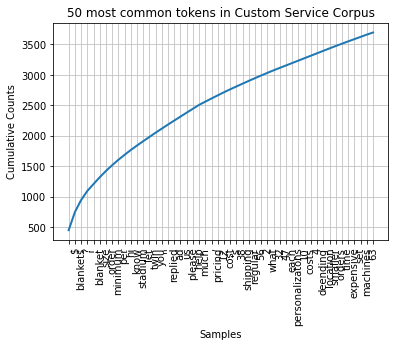

In [ ]:
from nltk import FreqDist

fd = FreqDist(corpus)
fd.plot(50, cumulative=True, title="50 most common tokens in Custom Service Corpus")

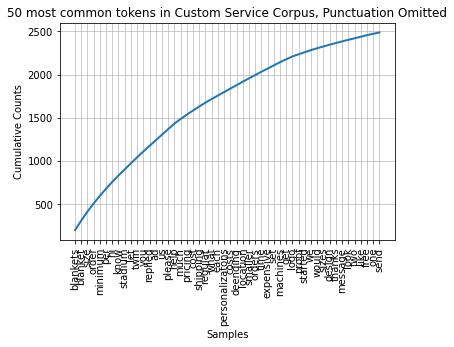

In [ ]:
fd_nopunc = FreqDist(dict((word, freq) for word, freq in fd.items() if word.isalpha()))
fd_nopunc.plot(50, cumulative=True, title="50 most common tokens in Custom Service Corpus, Punctuation Omitted")

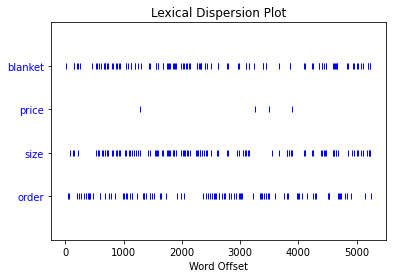

In [ ]:
from nltk import Text

corpus_text = Text(corpus)
corpus_text.dispersion_plot(['blanket', 'price', 'size', 'order'])

In [ ]:
print(fd.hapaxes()[:25])

['slow', 'response', 'training', 'center', 'raffle', 'away', 'steven', 'finish', 'minute', 'there', 'scot-michele', 'jefferey', 'phillips', 'morning', 'personlized', 'deckard', 'susie', 'many', 'week', 'somehow', 'incorporate', 'wisconsin', 'understand', 'meet', 'meeting']


In [ ]:
print(corpus_text.collocations())

minimum order; per blanket; please let; know help; regular pricing;
expensive set; shipping costs; orders expensive; set time; time
machines; smaller orders; twin size; order regular; deending size;
size location; blanket deending; blankets cost; blanket shipping; much
blankets; get started
None


In [ ]:
sent_text = nltk.sent_tokenize(raw_corpus)
word_text = nltk.word_tokenize(raw_corpus)

In [ ]:
import math

lengths = [len(i) for i in sent_text]
average_sentence_length = sum(lengths)/len(lengths)

In [ ]:
average_sentence_length

51.73839662447257

The above I think is not correct because I am working with messages in the column of a dataframe rather than a text document. I converted these messages to a corpus in order to run these experiments, but I think the results are not useful.

In [ ]:
import numpy as np

average_word_length = df_test['tokenized_no_stopwords'].apply(lambda x: np.mean([len(y) for y in x]))

In [ ]:
print(f"The average word length in a message (tokenized with stop words removed) is {np.round(np.mean(average_word_length),2)}")

The average word length in a message (tokenized with stop words removed) is 4.1


In [ ]:
average_message_length = df_test['tokenized_no_stopwords'].apply(lambda x: np.mean([len(x)]))
print(f"The average word length in a message (tokenized with stop words removed) is {np.round(np.mean(average_message_length),2)}")

The average word length in a message (tokenized with stop words removed) is 10.49


These results make more sense and then average sentence length of 4 coincides with what was found in the Week 3 NLTK workshop

#### Stemmer, Lemmatizer, POS tagger, NER

         

Make sure to have separate layers for each task (= separate vector/arrays), do not process them in a linear sequence. Do not apply pos tagger and NER to lemmatizer and stemmer output and do not apply lemmatizer to stemmer output (a customized function will help you control which option to choose) - see Lecture 3 about processing pipeline.

Note - for POS tagger you need a tokenized raw corpus  (keep punctuation, stopwords, capitalization), for stemmer and lemmatizer, you should use a tokenized corpus without punctuation, stopwords, upper cases. For NER you can use spaCy method (see example):

#### Porter Stemmer

In [ ]:
df_smalltest = df_test.sample(10)

In [ ]:
from nltk.stem import PorterStemmer

ps=PorterStemmer()
df_smalltest['stems'] = df_smalltest['tokenized_no_stopwords'].apply(lambda x: [ps.stem(word) for word in x])

In [ ]:
df_smalltest['stems'].sample().all()

['63x90',
 'robert',
 'vangord',
 '109',
 '3rd',
 'ave',
 'frankfort',
 ',',
 'ny',
 '13340']

#### Lemmatizer

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df_smalltest['lemmatized'] = df_smalltest['tokenized_no_stopwords'].apply(lambda x: [ps.stem(word) for word in x if word.isalpha()])

In [ ]:
df_smalltest['lemmatized'].sample().all()

['minimum',
 'order',
 'regular',
 'price',
 'blanket',
 'smaller',
 'order',
 'expens',
 'set',
 'time',
 'machin']

#### POS Tagger

In [ ]:
nltk.download('averaged_perceptron_tagger')

df_smalltest['POS tagged'] = df_smalltest['tokenized_raw'].apply(lambda x: nltk.pos_tag(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df_smalltest['POS tagged'].sample().all()

[('hi', 'NN'),
 ('jon', 'NN'),
 (',', ','),
 ('thanks', 'NNS'),
 ('interest', 'NN'),
 ('!', '.'),
 ('i', 'JJ'),
 ("'ll", 'MD'),
 ('attach', 'VB'),
 ('info', 'JJ'),
 ('sheet', 'NN'),
 ('answer', 'NN'),
 ('questions', 'NNS')]

Example from instructions:

```
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print([(X.text, X.label_) for X in doc.ents])
```





In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
#doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
df_smalltest['NER doc'] = df_smalltest['content'].apply(lambda x: nlp(x))
df_smalltest['NER'] = df_smalltest['NER doc'].apply(lambda x: [(y.text, y.label_) for y in x.ents])
#print([(X.text, X.label_) for X in doc.ents])

In [ ]:
df_smalltest['NER'].sample().all()

[('robert vangorder', 'PERSON'),
 ('3rd ave frankfort', 'ORG'),
 ('13340', 'DATE')]

### Entire Dataset

#### Preprocesser Class and Methods

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from nltk.stem import PorterStemmer
from datetime import datetime
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


#Function definitions required for the Preprocesser Class

def encrypt(text,s):
  result = ""
    # transverse the plain text
  for i in range(len(text)):
    char = text[i]
    # Encrypt uppercase characters in plain text
    
    if (char.isupper()):
      result += chr((ord(char) + s-65) % 26 + 65)
    # Encrypt lowercase characters in plain text
    else:
      result += chr((ord(char) + s - 97) % 26 + 97)
  return result

def strip_and_lower(text):
  str(text)
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
  text = text.lower()
  text = text.strip()
  return text

def custom_stopwords(text):
    if not text:
        #print('The text to have stop words removed is a None type or integer. Defaulting to blank string.')
        text = ''
    return ' '.join([word for word in text.split() if word not in (stop)])

def custom_tokenize(text):
    if not text:
        #print('The text to be tokenized is a None type or integer. Defaulting to blank string.')
        text = ''
    return nltk.word_tokenize(text)

#Intialize required objects for the Preprocessor Class
ps=PorterStemmer()
nlp = en_core_web_sm.load()
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()



class Preprocesser:

  def __init__(self, df):
    self.df = df

  def clean(self):
    #self.df['timestamp_ms'] = self.df['timestamp_ms'].apply(lambda x : datetime.fromtimestamp(int(str(x))/1000))
    self.df['sender_name'] = self.df['sender_name'].apply(lambda x : encrypt(x,16) if x != "Logo Knits" else "Logo Knits")
    self.df = self.df.fillna("empty")

  
  def process(self):
    self.df['content_raw'] = self.df['content']
    self.df['content']=self.df['content'].apply(strip_and_lower)
    self.df['no_stopwords'] = self.df['content'].apply(custom_stopwords)
    self.df['tokenized_no_stopwords'] = self.df['no_stopwords'].apply(custom_tokenize)
    self.df['tokenized_raw'] = self.df['content_raw'].apply(custom_tokenize)
    self.df['stems'] = self.df['tokenized_no_stopwords'].apply(lambda x: [ps.stem(word) for word in x])
    self.df['lemmatized'] = self.df['tokenized_no_stopwords'].apply(lambda x: [ps.stem(word) for word in x if word.isalpha()])
    self.df['POS tagged'] = self.df['tokenized_raw'].apply(lambda x: nltk.pos_tag(x))
    self.df['NER doc'] = self.df['content'].apply(lambda x: nlp(x))
    self.df['NER'] = self.df['NER doc'].apply(lambda x: [(y.text, y.label_) for y in x.ents])

  def show_samples(self):
    print("Content sample:")
    print(self.df['content'].sample().all())
    print("")
    print("No Stopwords sample:")
    print(self.df['no_stopwords'].sample().all())
    print("")
    print("Tokenized No Stopwords sample:")
    print(self.df['tokenized_no_stopwords'].sample().all())
    print("")
    print("Tokenized Raw sample:")
    print(self.df['tokenized_raw'].sample().all())
    print("")
    print("Stems sample:")
    print(self.df['stems'].sample().all())
    print("")
    print("Lemmatized sample:")
    print(self.df['lemmatized'].sample().all())
    print("")
    print("POS Tagged sample:")
    print(self.df['POS tagged'].sample().all())
    print("")
    print("NER Doc sample:")
    print(self.df['NER doc'].sample().all())
    print("")
    print("NER sample:")
    print(self.df['NER'].sample().all())
    print("")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Load messages and assign message_id

In [ ]:
from tqdm import tqdm
import pandas as pd
import os
import json

conversation_count = 0

df = pd.DataFrame()

#1847 Items
#Run-time usually between 10 and 18 minutes

folder = '/content/drive/MyDrive/Colab Notebooks/messages'

for dirname, dirs, files in tqdm(os.walk(folder)):
    for filename in files:
      filename_without_extension, extension = os.path.splitext(filename)
      if extension == '.json':
        with open(dirname+'/'+filename) as json_file:
          conversation_count += 1
          data = json.load(json_file)
          message_count = 0
          for message in data['messages']:
            message_count += 1
            m = pd.DataFrame.from_dict(message, orient='index')
            m = m.T
            m['conversation_id'] = conversation_count
            m['message_id'] = message_count
            df = df.append(m)

1847it [01:39, 18.55it/s]


In [ ]:
#checksum conversation_count
conversation_count == 1428

True

In [ ]:
preprocessor = Preprocesser(df)
preprocessor.clean()
preprocessor.process()

In [ ]:
preprocessor.show_samples()

Content sample:
stadium blankets are between  and  each and twin size blankets are between  and  each  personalizatons are  per blanket and shipping costs  to  per blanket deending on size and location

No Stopwords sample:
much blankets cost

Tokenized No Stopwords sample:
['dominique', 'sherrie', 'olivarez', 'replied', 'ad']

Tokenized Raw sample:
['The', 'minimum', 'order', 'for', 'regular', 'pricing', 'is', '12', 'blankets', '.', 'We', 'do', 'smaller', 'orders', 'but', 'they', 'are', 'more', 'expensive', 'because', 'of', 'all', 'the', 'set', 'up', 'time', 'on', 'our', 'machines', '.']

Stems sample:
['dimens', 'blanket']

Lemmatized sample:
['minimum', 'order', 'regular', 'price', 'blanket', 'smaller', 'order', 'expens', 'set', 'time', 'machin']

POS Tagged sample:
[('How', 'WRB'), ('much', 'JJ'), ('do', 'VBP'), ('blankets', 'NNS'), ('cost', 'VB'), ('?', '.')]

NER Doc sample:
stadium blankets are between  and  each and twin size blankets are between  and  each  personalizatons are

I think that the results here are quite good. I don't expect to find many samples that have more than one or two results in the NER list. The conversations are usually quite casual and I think that if there is a Named Entity, it will most likely be a shipping address or a quantity.

## Part 3: Vectorizers

### CountVectorizer

apply CountVectorizer from sklearn 

what is your vocabulary size (shape of your matrix)?
sort and print top 10 frequent words



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import numpy as np


corpus = sum(preprocessor.df['tokenized_no_stopwords'], [])

In [ ]:
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(corpus)
cv_matrix

<83614x4187 sparse matrix of type '<class 'numpy.int64'>'
	with 82764 stored elements in Compressed Sparse Row format>

In [ ]:
cv_matrix.shape

(83614, 4187)

In [ ]:
counts = pd.DataFrame(cv_matrix.toarray(),
                      columns=cv.get_feature_names())
counts

,aaron,aberdeen,ability,able,abletomgive,absolutely,accept,account,accounts,accurate,ace,achieve,acknowledge,across,acrylic,acselrod,active,actual,actually,ad,adam,adamdavid,adamitriyahoocom,adams,add,added,addiction,adding,addition,additional,address,addressbut,adkins,adolf,adolfoutlookcom,adopt,adoption,adoptions,ads,advance,...,yarn,yates,yea,yeah,year,yearly,years,yellow,yep,yes,yesterday,yet,yo,yolanda,york,youd,youll,young,younger,youre,yous,yout,youve,yremogtnom,zac,zaccaro,zach,zachary,zack,zais,zap,zazueta,zeiner,zenon,zimmerman,zip,zl,zman,zoom,zorola
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
counts['blanket'].sum()

2532

In [ ]:
s = counts.sum()

In [ ]:
s.nlargest(n=10)

blankets    4696
blanket     2532
size        2418
hi          2030
per         1970
order       1935
know        1802
minimum     1762
let         1703
us          1692
dtype: int64

### TfidfTransformer and Vectorizer

what is your vocabulary size (shape of your matrix)?

sort and print top 10 frequent words


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
tfidf = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

In [ ]:
tfidf.sample(10)

,aaron,aberdeen,ability,able,abletomgive,absolutely,accept,account,accounts,accurate,ace,achieve,acknowledge,across,acrylic,acselrod,active,actual,actually,ad,adam,adamdavid,adamitriyahoocom,adams,add,added,addiction,adding,addition,additional,address,addressbut,adkins,adolf,adolfoutlookcom,adopt,adoption,adoptions,ads,advance,...,yarn,yates,yea,yeah,year,yearly,years,yellow,yep,yes,yesterday,yet,yo,yolanda,york,youd,youll,young,younger,youre,yous,yout,youve,yremogtnom,zac,zaccaro,zach,zachary,zack,zais,zap,zazueta,zeiner,zenon,zimmerman,zip,zl,zman,zoom,zorola
82530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf.shape

(83614, 4187)

In [ ]:
tfidf['blankets'].sample(10)

16880    0.0
61542    0.0
24597    0.0
58228    0.0
25929    1.0
30879    0.0
68598    0.0
20290    0.0
49597    0.0
10398    0.0
Name: blankets, dtype: float64

In [ ]:
t_s = tfidf.sum()
t_s.nlargest(n=10)

blankets    4696.0
blanket     2532.0
size        2418.0
hi          2030.0
per         1970.0
order       1935.0
know        1802.0
minimum     1762.0
let         1703.0
us          1692.0
dtype: float64

I'm confused by this result. My tfidf dataframe is looks identical to the CountVectorizer dataframe except the numbers are floats instead of integers. I don't think that there are any fractions. ***I tried using both tfidfTransformer and tfidfVectorizer, and the results were the same.***
Is it possibly because there is so little variation in the topics being discussed?
The code I used is directly from Ch04a Feature Engineering notebook.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_matrix.toarray())

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
tfidf = pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

In [ ]:
t_s = tfidf.sum()
t_s.nlargest(n=10)

blankets    4696.0
blanket     2532.0
size        2418.0
hi          2030.0
per         1970.0
order       1935.0
know        1802.0
minimum     1762.0
let         1703.0
us          1692.0
dtype: float64

In [ ]:
!cp drive/My Drive/Colab Notebooks/Knitsy Bot.ipynb ./
!jupyter nbconvert --to PDF "Knitsy Bot.ipynb"

cp: cannot stat 'drive/My': No such file or directory
cp: cannot stat 'Drive/Colab': No such file or directory
cp: cannot stat 'Notebooks/Knitsy': No such file or directory
cp: cannot stat 'Bot.ipynb': No such file or directory
[NbConvertApp] WARNING | pattern u'Knitsy Bot.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for g

# Rule Based Chatbots

## Manual

This was my first attempt. I primiarily relied on the sources in datacamp to build this sample. I was not satisfied with the results. In particular I was not happy with nltk wordnet. For example, it only returned 'price' as a synonym for 'pricing', which I think is quite a poor result.

In [ ]:
# Importing modules

import re
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Building a list of Keywords

list_words=['pricing','quantity', 'time','location']

list_syn={}

for word in list_words:

    synonyms=[]

    for syn in wordnet.synsets(word):

        for lem in syn.lemmas():


            # Remove any special characters from synonym strings

            lem_name = re.sub('[^a-zA-Z0-9 \n\.]', ' ', lem.name())

            synonyms.append(lem_name)


    list_syn[word]=set(synonyms)


print (list_syn)

{'pricing': {'price', 'pricing'}, 'quantity': {'amount', 'quantity', 'measure'}, 'time': {'sentence', 'time', 'clip', 'clock time', 'prison term', 'fourth dimension', 'metre', 'clock', 'meter'}, 'location': {'localization', 'locating', 'location', 'positioning', 'emplacement', 'fix', 'placement', 'position', 'localisation'}}


In [ ]:
# Building dictionary of Intents & Keywords

keywords={}

keywords_dict={}


# Defining a new key in the keywords dictionary

keywords['price']=[]


# Populating the values in the keywords dictionary with synonyms of keywords formatted with RegEx metacharacters 

for synonym in list(list_syn['pricing']):

    keywords['price'].append('.*\\b'+synonym+'\\b.*')


# Defining a new key in the keywords dictionary

keywords['quantity']=[]


# Populating the values in the keywords dictionary with synonyms of keywords formatted with RegEx metacharacters 

for synonym in list(list_syn['quantity']):

    keywords['quantity'].append('.*\\b'+synonym+'\\b.*')


keywords['time']=[]
# Populating the values in the keywords dictionary with synonyms of keywords formatted with RegEx metacharacters 

for synonym in list(list_syn['time']):

    keywords['time'].append('.*\\b'+synonym+'\\b.*')


# Defining a new key in the keywords dictionary

keywords['location']=[]


# Populating the values in the keywords dictionary with synonyms of keywords formatted with RegEx metacharacters 

for synonym in list(list_syn['location']):

    keywords['location'].append('.*\\b'+synonym+'\\b.*')

for intent, keys in keywords.items():


    # Joining the values in the keywords dictionary with the OR (|) operator updating them in keywords_dict dictionary

    keywords_dict[intent]=re.compile('|'.join(keys))

print (keywords_dict)

{'price': re.compile('.*\\bprice\\b.*|.*\\bpricing\\b.*'), 'quantity': re.compile('.*\\bamount\\b.*|.*\\bquantity\\b.*|.*\\bmeasure\\b.*'), 'time': re.compile('.*\\bsentence\\b.*|.*\\btime\\b.*|.*\\bclip\\b.*|.*\\bclock time\\b.*|.*\\bprison term\\b.*|.*\\bfourth dimension\\b.*|.*\\bmetre\\b.*|.*\\bclock\\b.*|.*\\bmeter\\b.*'), 'location': re.compile('.*\\blocalization\\b.*|.*\\blocating\\b.*|.*\\blocation\\b.*|.*\\bpositioning\\b.*|.*\\bemplacement\\b.*|.*\\bfix\\b.*|.*\\bplacement\\b.*|.*\\bposition\\b.*|.*\\blocalisation\\b.*')}


In [ ]:
responses={

    'price':'All pricing can be found at https://logoknnits.com/pricing',

    'quantity':'The minimum quantity for normal pricing is 12 blankets. We do smaller orders, however we have to charge extra.',

    'time':'Current lead time is 4-6 weeks from date of final approval',

    'location':'We are located in New Jersey. Everything that we sell is manufactured right here.',

    'fallback':'I dont quite understand. Could you repeat that?',

}

In [ ]:
print ("Welcome to LogoKnits. How may I help you?")


# While loop to run the chatbot indefinetely

while (True):  


    # Takes the user input and converts all characters to lowercase

    user_input = input().lower()


    # Defining the Chatbot's exit condition

    if user_input == 'quit': 

        print ("Thank you for visiting.")

        break    


    matched_intent = None 


    for intent,pattern in keywords_dict.items():


        # Using the regular expression search function to look for keywords in user input

        if re.search(pattern, user_input): 


            # if a keyword matches, select the corresponding intent from the keywords_dict dictionary

            matched_intent=intent  


    # The fallback intent is selected by default

    key='fallback' 

    if matched_intent in responses:


        # If a keyword matches, the fallback intent is replaced by the matched intent as the key for the responses dictionary

        key = matched_intent 


    # The chatbot prints the response that matches the selected intent

    print (responses[key]) 

Welcome to LogoKnits. How may I help you?
I dont quite understand. Could you repeat that?
All pricing can be found at https://logoknnits.com/pricing
I dont quite understand. Could you repeat that?
The minimum quantity for normal pricing is 12 blankets. We do smaller orders, however we have to charge extra.


In [ ]:
# Intents

import re

keywords = {'greet': ['hello', 'hi', 'hey'], 
            'goodbye': ['bye', 'farewell', 'goodbye'], 
            'thankyou': ['thank', 'thanks', 'thank you'],
            'pricing':['price', 'pricing', 'prices', 'how much', 'cost'],
            'minimum_quantity': ['minimum', 'minimum order', 'minimum quantity'],
            'single_piece': ['1', 'myself', 'individual', 'single', 'less than'],
            'timing':['how long', 'lead time', 'when'],
            'location':['where', 'located', 'location', 'address'],
            }

# Define a dictionary of patterns
patterns = {}

# Iterate over the keywords dictionary
for intent, keys in keywords.items():
    # Create regular expressions and compile them into pattern objects
    patterns[intent] = re.compile('|'.join(keys))
    
# Print the patterns
print(patterns)

{'greet': re.compile('hello|hi|hey'), 'goodbye': re.compile('bye|farewell|goodbye'), 'thankyou': re.compile('thank|thanks|thank you'), 'pricing': re.compile('price|pricing|prices|how much|cost'), 'minimum_quantity': re.compile('minimum|minimum order|minimum quantity'), 'single_piece': re.compile('1|myself|individual|single|less than'), 'timing': re.compile('how long|lead time|when'), 'location': re.compile('where|located|location|address')}


In [ ]:
# More keywords

# Importing modules

import re
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')

list_words=['greet','goodbye','thanks', 'minimum', 'prices', 'individual', 'timing', 'location']

list_syn={}

for word in list_words:

    synonyms=[]

    for syn in wordnet.synsets(word):

        for lem in syn.lemmas():


            # Remove any special characters from synonym strings

            lem_name = re.sub('[^a-zA-Z0-9 \n\.]', ' ', lem.name())

            synonyms.append(lem_name)


    list_syn[word]=set(synonyms)

#These are really bad, don't use them
print (list_syn)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
{'greet': {'recognise', 'recognize', 'greet'}, 'goodbye': {'good day', 'goodbye', 'auf wiedersehen', 'sayonara', 'arrivederci', 'cheerio', 'au revoir', 'bye', 'so long', 'adieu', 'adios', 'good by', 'goodby', 'bye bye', 'good bye'}, 'thanks': {'thanks', 'thank', 'give thanks'}, 'minimum': {'lower limit', 'minimal', 'minimum'}, 'prices': {'terms', 'Mary Leontyne Price', 'damage', 'Price', 'monetary value', 'cost', 'toll', 'Leontyne Price', 'price'}, 'individual': {'person', 'someone', 'mortal', 'individual', 'single', 'item by item', 'somebody', 'soul', 'private', 'case by case'}, 'timing': {'timing', 'clock', 'time'}, 'location': {'fix', 'positioning', 'localization', 'position', 'location', 'placement', 'emplacement', 'localisation', 'locating'}}


In [ ]:
# Responses

responses = {'default': 'I\'m not sure what you mean, can you please rephrase and try again?',
              'goodbye': 'Goodbye and thank you for your interest!',
              'greet': 'Hi! I\'m Knitsy the Chatbot, how can I help?',
              'thankyou': 'You\'re welcome! Please let me know if you have other questions.',
              'pricing': "",
              'minimum_quantity': "The minimum quantity for regular pricing is 12 blankets. There are price breaks at 24, 48, and 96 blankets.",
              'single_piece': "We do less-than-minimum orders however we have to charge extra for them. When you e-mail us your design, please let us know you'd like to place a smaller order and we'll provide a quote.",
              'timing': "Lead time on ordes right now is about 6 weeks, not including the design process which takes about a week",
              'location': 'We are located on Cindy Lane in Ocean Township NJ. 100% of the manufacturing takes place right here.'}

In [ ]:
# Define a function to find the intent of a message
def match_intent(message):
    matched_intent = None
    for intent, pattern in patterns.items():
        # Check if the pattern occurs in the message 
        if pattern.search(message):
            matched_intent = intent
    return matched_intent

# Define a respond function
def respond(message):
    # Call the match_intent function
    intent = match_intent(message)
    # Fall back to the default response
    key = "default"
    if intent in responses:
        key = intent
    return responses[key]

respond("hi")

"Hi! I'm Knitsy the Chatbot, how can I help?"

## Chatterbot

### Second Attempt

#### Cloudmersive Rephrasing
Include more variations of questions for training Chatterbot

https://github.com/Cloudmersive/Cloudmersive.APIClient.Python.NLP

##### Get the phrases

In [2]:
!pip install cloudmersive_nlp_api_client

  Created wheel for cloudmersive-nlp-api-client: filename=cloudmersive_nlp_api_client-4.0.1-py3-none-any.whl size=131637 sha256=c587fc8e0fd1b5f3188d372d2c3536174b1d237ce961b4d06f6dbbed1ee70f8f
  Stored in directory: /root/.cache/pip/wheels/e4/47/ff/3b92ffe9a396915a568eb9f6ad9f9509d3ba9822c0a83f7e30
Successfully built cloudmersive-nlp-api-client


In [ ]:
from __future__ import print_function
import time
import cloudmersive_nlp_api_client
from cloudmersive_nlp_api_client.rest import ApiException
from pprint import pprint

# Configure API key authorization: Apikey
configuration = cloudmersive_nlp_api_client.Configuration()
configuration.api_key['Apikey'] = 'XXXXXXXXXXXXX
# Uncomment below to setup prefix (e.g. Bearer) for API key, if needed
# configuration.api_key_prefix['Apikey'] = 'Bearer'

# create an instance of the API class
api_instance = cloudmersive_nlp_api_client.RephraseApi(cloudmersive_nlp_api_client.ApiClient(configuration))
input = cloudmersive_nlp_api_client.RephraseRequest(text_to_translate="How much do they cost?", target_rephrasing_count=2) # RephraseRequest | Input rephrase request

try:
    # Rephrase, paraphrase English text sentence-by-sentence using Deep Learning AI
    api_response = api_instance.rephrase_english_rephrase_sentence_by_sentence(input)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling RephraseApi->rephrase_english_rephrase_sentence_by_sentence: %s\n" % e)

{'rephrased_results': [{'original_sentence_text': 'How much do they cost?',
                        'rephrasings': [{'rephrased_option_index': 1,
                                         'rephrased_sentence_text': 'How much '
                                                                    'they cost '
                                                                    '@-@?'},
                                        {'rephrased_option_index': 2,
                                         'rephrased_sentence_text': 'What are '
                                                                    'the-costs?'}],
                        'sentence_index': 1}],
 'sentence_count': 1,
 'successful': True}


In [ ]:
questions = ["How much do they cost?", "What's the minimum order?", "How do I order?", "How long does it take?", "Can I order just one?", "Can I order less than 12?",
             "Why does my logo look jagged?", "Why is the logo not proportional?", "Do you accept purchase orders?", "When do I pay?", "Are design proofs free?", "Why do I have to pay for more proofs?",
             "Do I need to make a deposit?", "Why does it cost more if I order less than the minimum?", "Can you match our colors exactly?", "Can we combine sizes to reach the minimum?",
             "Can we combine designs to reach the minimum?"]



In [ ]:
phrases={}

for question in questions:
  # create an instance of the API class
  api_instance = cloudmersive_nlp_api_client.RephraseApi(cloudmersive_nlp_api_client.ApiClient(configuration))
  input = cloudmersive_nlp_api_client.RephraseRequest(text_to_translate=question, target_rephrasing_count=10) # RephraseRequest | Input rephrase request

  try:
      # Rephrase, paraphrase English text sentence-by-sentence using Deep Learning AI
      api_response = api_instance.rephrase_english_rephrase_sentence_by_sentence(input)
      phrases[question] = api_response
  except ApiException as e:
      print("Exception when calling RephraseApi->rephrase_english_rephrase_sentence_by_sentence: %s\n" % e)



Exception when calling RephraseApi->rephrase_english_rephrase_sentence_by_sentence: (401)
Reason: Invalid API key or exceeded limits.
HTTP response headers: HTTPHeaderDict({'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Expires': '-1', 'Server': 'Cloudmersive Server', 'X-AspNet-Version': '4.0.30319', 'Request-Context': 'appId=cid-v1:df6d1008-836d-4e95-b2e6-90c4de591e45', 'Access-Control-Expose-Headers': 'Request-Context', 'X-Powered-By': 'ASP.NET, ARR/3.0, Cloudmersive', 'Date': 'Thu, 02 Dec 2021 22:21:33 GMT', 'Content-Length': '0'})




In [ ]:
len(phrases)

16

##### Save and Load data

In [ ]:
#Save phrases dictionary as JSON
#Limited to 800 API calls per month

import json
import pickle

with open('phrases.json', 'wb') as fp:
    pickle.dump(phrases, fp)

In [3]:
import json
import pickle

with open('phrases.json', 'rb') as fp:
    phrases = pickle.load(fp)

#### Reorganize and retrain

In [19]:
#from chatbot import chatbot
!pip install chatterbot
from chatterbot.trainers import ListTrainer
from chatterbot import ChatBot

bot = ChatBot('Knitsy',
              logic_adapters=[
        {
            'import_path': 'chatterbot.logic.BestMatch',
            'default_response': 'I am sorry, but I do not understand.',
            'maximum_similarity_threshold': 0.70
        
        },
        #{
         #   "import_path": "chatterbot.logic.BestMatch",
         #   "statement_comparison_function": "chatterbot.comparisons.SpacySimilarity",
         #   "response_selection_method": "chatterbot.response_selection.get_most_frequent_response"
        #}
        ]#,
        #      preprocessors=['chatterbot.preprocessors.clean_whitespace',
        #                      'chatterbot.preprocessors.unescape_html',
        #                      'chatterbot.preprocessors.convert_to_ascii']
     #   {
     #       'import_path': 'chatterbot.logic.SpecificResponseAdapter',
     #       'input_text': 'Help me!',
     #       'output_text': 'Ok, here is a link: http://chatterbot.rtfd.org'
     #   }
    )

trainer = ListTrainer(bot)

In [20]:
#TODO
#Make a method for training on different conversation lists

'''
For Reference:

questions = ["How much do they cost?", "What's the minimum order?", "How do I order?", "How long does it take?", "Can I order just one?", "Can I order less than 12?",
             "Why does my logo look jagged?", "Why is the logo not proportional?", "Do you accept purchase orders?", "When do I pay?", "Are design proofs free?", "Why do I have to pay for more proofs?",
             "Do I need to make a deposit?", "Why does it cost more if I order less than the minimum?", "Can you match our colors exactly?", "Can we combine sizes to reach the minimum?",
             "Can we combine designs to reach the minimum?"]


'''

#Sample conversations
#Modular variables. Easier to update when things change.
sizes = ['63" x 63"', '63" x 90"']
tiers = ['12-23', '24-47', '48-95', '96 and up']

prices = {
    '63x63': {
    '12-23': "$40",
    '24-47': "$38",
    '48-95': "$35",
    '96 and up': "$33",
    'Freight': 'Shipping to zipcodes 00000-49999 is $2.50 per blanket, 50000-79999 is $4 per blanket, and 80000-99999 is $4.50 per blanket. For AK, HI, or international, please contact us for a special quote.',
    'Personalization': 'Personalizations are $12 per blanket regardless of quantity'
},
    
    '63x90': {
    '12-23': "$60",
    '24-47': "$55",
    '48-95': "$51",
    '96 and up': "$48",
    'Freight': 'Shipping to zipcodes 00000-49999 is $3.50 per blanket, 50000-79999 is $5 per blanket, and 80000-99999 is $5.50 per blanket. For AK, HI, or international, please contact us for a special quote.',
    'Personalization': 'Personalizations are $12 per blanket regardless of quantity'

}}

#Misc-------------------------------------------

location = ["Where are you located?",
            "We're on Cindy Lane in Ocean Township, NJ. 100% of the manufacturing takes place right here. You're welcome to pick up your blankets to save on shipping costs."]
trainer.train(location)

canada = ["Do you ship to Canada?",
          "Yes, prices for the blankets are the same but we'll need your shipping address to give you a special quote on freight"]
trainer.train(canada)

order_format = ["What's the best way to submit an order?",
                "The best way to submit an order is to email your customer service rep (If you haven't started yet, go to logoknits.com/contact). They'll need to know size, quantity, and shipping address."\
                " If you were working on multiple designs, please specify which design you're going with. If any blankets are personalized, please include a list of personalizations"]

for rephrasing in phrases["How do I order?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  m = order_format
  trainer.train(m)

  m[0] = question

####
time = ["How long does it take? When can I expect to receive my order?",
        "Production time right now is about 6 weeks. If you're ordering for the first time, that doesn't include about a week for the design process"]

for rephrasing in phrases["How long does it take?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  m = time
  trainer.train(m)

  m[0] = question

####
purchase_order = ["Do you take purchase orders?",
                  "Yes but they must be from the school district or other verifiable and credit-worthy entity."]

for rephrasing in phrases["Do you accept purchase orders?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  m = purchase_order
  trainer.train(m)

  m[0] = question

####

pay_when = ["When do I have to pay?",
            "We require payment before we ship. Not paying right away will not delay production."]

for rephrasing in phrases["When do I pay?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  m = pay_when
  trainer.train(m)

  m[0] = question

####
deposit = ["Do I need to make a deposit?",
           "No, we don't require a deposit. We require full payment before we ship, but not before production"]

for rephrasing in phrases["Do I need to make a deposit?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  m = deposit
  trainer.train(m)

  m[0] = question

####
combine_size = ["Can we combine sizes to reach the 12 blanket minimum?",
                "Yes, but please do at least six of each size."]

for rephrasing in phrases["Can we combine sizes to reach the minimum?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  m = combine_size
  trainer.train(m)

  m[0] = question

####
combine_design = ["Can we combine designs to reach the 12 blanket minimum?",
                  "Yes, but please do at least six of each design."]

for rephrasing in phrases["Can we combine designs to reach the minimum?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  m = combine_design
  trainer.train(m)

  m[0] = question

#Pricing----------------------------------------
pricing_63 = ["How much do they cost?",
              "We have two sizes available, 63\" x 63\" and 63\" x 90\". Which size do you want pricing for?",
              '63" x 63"',
              f"Okay...here we go:\n"\
              f"For quantity between 12 and 23 they are {prices['63x63']['12-23']}.\n"\
              f"For quantity between 24 and 47 they are {prices['63x63']['24-47']}.\n"\
              f"For quantity between 48 and 95 they are {prices['63x63']['48-95']}.\n"\
              f"For quantity 96 and up they are {prices['63x63']['96 and up']}.\n"\
              f"{prices['63x63']['Freight']}.\n"\
              f"{prices['63x63']['Personalization']}."]

pricing_90 = ["How much do they cost?",
              "We have two sizes available, 63\" x 63\" and 63\" x 90\". Which size do you want pricing for?",
              '63" x 90"',
              f"Okay...here we go:\n"\
              f"For quantity between 12 and 23 they are {prices['63x90']['12-23']}.\n"\
              f"For quantity between 24 and 47 they are {prices['63x90']['24-47']}.\n"\
              f"For quantity between 48 and 95 they are {prices['63x90']['48-95']}.\n"\
              f"For quantity 96 and up they are {prices['63x90']['96 and up']}.\n"\
              f"{prices['63x90']['Freight']}.\n"\
              f"{prices['63x90']['Personalization']}."]

for rephrasing in phrases['How much do they cost?'].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)

  s = pricing_63
  n = pricing_90
  trainer.train(s)
  trainer.train(n)

  s[0] = question
  n[0] = question



#Minimum Order----------------------------------------

minimum_order = ["What's the minimum order?",
                 "The minimum order for regular pricing is 12 blankets."]

for rephrasing in phrases["What's the minimum order?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  m = minimum_order
  trainer.train(m)

  m[0] = question


smaller_order = ["I don't want to order 12, do you do smaller orders?",
                 "Yes, but we have to charge extra. Please email us with more details for a custom quote"]

for rephrasing in phrases["Can I order just one?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  s = smaller_order
  trainer.train(s)

  s[0] = question

for rephrasing in phrases["Can I order less than 12?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  s = smaller_order
  trainer.train(s)

  s[0] = question


minimum_why = ["Why does it cost more if I order less than the minimum?",
               "Two reasons. The first is the amount of time it takes to set up an order on a knitting machine. The second is that freight carriers charge us a lot more for smaller shipments."]

for rephrasing in phrases["Why does it cost more if I order less than the minimum?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  s = minimum_why
  trainer.train(s)

  s[0] = question

#Designs-------------------------------------
proof_time = ["How long does a design proof take?",
              "Design proofs can take up to 5 business days depending on the complexity."]

for rephrasing in phrases["How long does it take?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text) + " proof|design|logo"
  p = proof_time
  trainer.train(p)

  p[0] = question

####
proof_format = ["Is there a format that works best for submitting my logo?",
                "An .ai file or vectorized .pdf would save us some work. But .jpg and .png are fine too."]

trainer.train(proof_format)

####
picture = ["Can you put a photograph on a blanket?",
           "Unfortunately, we cannot. Our blankets are knit and while we're proud of the designs that we can do, the resolution of the stitches is too low for photos."]

trainer.train(picture)

####
proof_free = ["Is the design proof free?",
              "Yes, the first proof is free. Small color revisions are included in this. However major changes to the scale and/or design will likely incure an art charge."]

for rephrasing in phrases["Are design proofs free?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  p = proof_free
  trainer.train(p)

  p[0] = question

####
multiple_proofs = ["Why is there a charge to see multiple layouts?",
                   "Making design proofs is a pixel by pixel process which is time-consuming and expensive. Each account receives one free design proof (minor color revisions included)."]

trainer.train(multiple_proofs)


####
match_colors = ["Can you match our colors exactly?",
                "Probably not exactly. We have almost 30 colors to choose from, but we stock our yarn months in advance so we only stock colors that work for a lot of different designs."]

for rephrasing in phrases["Can you match our colors exactly?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  p = match_colors
  trainer.train(p)

  p[0] = question

####
jagged_image = ["Why does the logo look jagged?",
                "Each pixel in the design represents a stitch in the blanket. We try to make the design proofs represent the blanket as closely as possible so you get a good idea of what they'd look like before you decide to purchase."]

for rephrasing in phrases["Why does my logo look jagged?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  p = jagged_image
  trainer.train(p)

  p[0] = question

####
proof_proportion = ["Why isn't the logo perfectly proportional?",
                    "We have to adjust the logo in this phase because pixels on a screen are square but stitches on a blanket are rectangular."\
                    "Once the blankets are knit, the scale will be correct."]

for rephrasing in phrases["Why is the logo not proportional?"].rephrased_results[0].rephrasings:
  question = str(rephrasing.rephrased_sentence_text)
  p = proof_proportion
  trainer.train(p)

  p[0] = question



List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [####################] 100%
List Trainer: [###################

In [23]:
print("Welcome to Logo Knits! Let me know how can I help you?")
while True:
    request=input('guest:')
    if request=='Bye' or request =='bye':
        #print('Guest: Bye')
        print('Bot: Bye')
        break
    else:
        response=bot.get_response(request)
        #print('Guest:',request)
        print('Bot:',response)

Welcome to Logo Knits! Let me know how can I help you?
guest:i'd like to buy a blanket
Bot: I am sorry, but I do not understand.
guest:how much do they cost?
Bot: We have two sizes available, 63" x 63" and 63" x 90". Which size do you want pricing for?
guest:63 x 90
Bot: Okay...here we go: For quantity between 12 and 23 they are $60. For quantity between 24 and 47 they are $55. For quantity between 48 and 95 they are $51. For quantity 96 and up they are $48. Shipping to zipcodes 00000-49999 is $3.50 per blanket, 50000-79999 is $5 per blanket, and 80000-99999 is $5.50 per blanket. For AK, HI, or international, please contact us for a special quote.. Personalizations are $12 per blanket regardless of quantity.
guest:what if i don't want to order 12?
Bot: The best way to submit an order is to email your customer service rep (If you haven't started yet, go to logoknits.com/contact). They'll need to know size, quantity, and shipping address. If you were working on multiple designs, please s